# Linear Interpolation

The simplest interpolation we can imagine is doing _connect-the-dots_, and simply
connecting our data samples with straight lines.

![example of linear interpolation](linear-interpolation.png)

As we see, this only gets the correct values at the end points (for a general function), but it has the nice property that it does not introduce any new minima or maxima.

Given some N points sampling a function, $(x_i, f_i)$, the interpolant connecting the points $i$ and $i+1$ is:

$$f(x) = \frac{f_{i+1} - f_i}{x_{i+1} - x_i} (x - x_i) + f_i$$

for $x_i \le x \le x_{i+1}$

For N points, we have $N-1$ interpolants.

## Piecewise interpolation

This is an example of _piecewise interpolation_.  We don't try to fit all of the
points with a single polynomial, but instead fit a subset of points with a low-order
polynomial (in this case, a line).

```{admonition} Example
Let's write a function to tabulate $f(x) = x \sin(x)$ on $[0, 5]$ and then use linear interpolation to get the function values.
    
How many function samples do we need to get a 1% error?
```

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def f(x):
    return x * np.sin(x)

In [19]:
def sample_function(func, npts, *, xmin=0.0, xmax=10.0):
    xx = np.linspace(xmin, xmax, npts)
    return xx, func(xx)

Let's look at this function and 10 samples

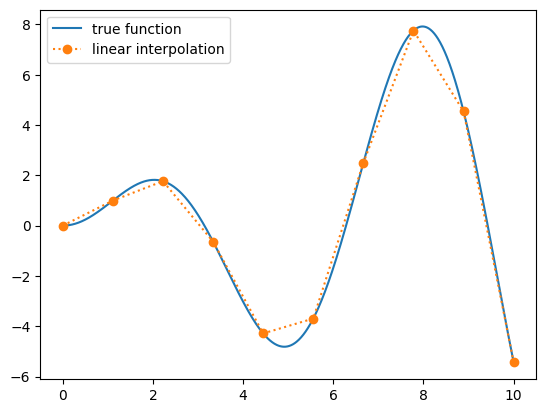

In [25]:
fig, ax = plt.subplots()
xmin = 0.0
xmax = 10.0
N = 10

x_fine = np.linspace(xmin, xmax, 1000)
x_sample, f_sample = sample_function(f, N, xmin=xmin, xmax=xmax)

ax.plot(x_fine, f(x_fine), label="true function")
ax.plot(x_sample, f_sample, marker="o", ls=":", label="linear interpolation")
ax.legend()

Now let's define our interpolate function.  This will take the location and values where the function is sampled, (`xv`, `fv`), and the location where we want to approximate the value of the underlying function, `x0`.

In [21]:
def interpolate(x0, xv, fv):
    
    # find first x[i] > x0
    idx = np.argwhere(xv > x0)[0][0]
    
    # we want to use this point and the one to the left
    # we'll shift idx to point to the left point
    idx = max(0, idx-1)
    
    slope = (fv[idx+1] - fv[idx]) / (xv[idx+1] - xv[idx])
    return slope * (x0 - xv[idx]) + fv[idx]

Let's just look at $x_0 = 4.5$ (this is near a minimum) and try different number of points and measure the error

In [26]:
x0 = 4.5

In [27]:
for n in [5, 10, 20, 40, 80, 160]:
    xv, fv = sample_function(f, n)

    finterp = interpolate(x0, xv, fv)
    fexact = f(x0)
    err = np.abs(finterp - fexact)
    print(f"{n:4} points, error = {err}")

   5 points, error = 0.8624245028923605
  10 points, error = 0.14257394829953363
  20 points, error = 0.1333081368280027
  40 points, error = 0.03204962648664189
  80 points, error = 0.007851522573614211
 160 points, error = 0.0019427475977087383


In this case, after 80 points, our error is < 1%.  

We also see that we appear to converge slightly better than 2nd order

## C++ implementation

Here's a C++ version that follows the same ideas:

```{literalinclude} ../../examples/interpolation/linear_interp.cpp
:language: C++
```